In [1]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import normalize
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn import preprocessing
from scipy import stats
from sklearn.preprocessing import RobustScaler
#import pyarrow as pa
#import pyarrow.parquet as pq
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

In [2]:
df_accidents=pd.read_csv('2017_Accidents_UK_Clean.csv',index_col=0)
df_accidents = df_accidents.drop(['lsoa_of_accident_location','accident_index','accident_year','accident_reference','location_easting_osgr','location_northing_osgr','date','time'], axis=1)
data_out=df_accidents['accident_severity']
df_accidents = df_accidents.drop('accident_severity',axis=1)
df_accidents.head(50)


,longitude,latitude,police_force,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag
0,-0.080107,51.650061,0.197239,2,3,0.132719,0.005989,0.005989,0.005989,0,0.001616,0.735379,30.0,0.416478,0.418434,0,0.417577,0.977588,0.795293,0.207657,0.835243,0.718221,0.973215,0.976513,0.666866,0.758745,0.838153
1,-0.173845,51.522425,0.197239,2,1,0.115059,0.012536,0.012536,0.012536,0,0.006312,0.735379,30.0,0.300837,0.454820,6,0.440305,0.977588,0.795293,0.207657,0.835243,0.256999,0.973215,0.976513,0.666866,0.758745,0.838153
2,-0.052969,51.514096,0.197239,3,1,0.115059,0.008341,0.008341,0.008341,0,0.003459,0.735379,30.0,0.300837,0.454820,4,0.440305,0.977588,0.795293,0.207657,0.835243,0.718221,0.973215,0.976513,0.666866,0.758745,0.838153
3,-0.060658,51.624832,0.197239,2,1,0.115059,0.005989,0.005989,0.005989,0,0.001245,0.066000,30.0,0.083813,0.454820,3,0.000081,0.977588,0.062258,0.207657,0.114146,0.256999,0.973215,0.976513,0.666866,0.758745,0.838153
4,-0.072372,51.573408,0.197239,1,1,0.115059,0.006918,0.006918,0.006918,0,0.001350,0.160804,20.0,0.095969,0.111042,1,0.000921,0.977588,0.073120,0.207657,0.835243,0.256999,0.973215,0.976513,0.666866,0.758745,0.838153
5,-0.353876,51.438762,0.197239,2,1,0.115059,0.003306,0.003306,0.003306,5,0.409018,0.735379,30.0,0.416478,0.418434,0,0.417577,0.977588,0.795293,0.207657,0.835243,0.256999,0.973215,0.976513,0.666866,0.758745,0.838153
6,-0.435377,51.525305,0.197239,2,2,0.115059,0.005617,0.005617,0.005617,0,0.002392,0.160804,40.0,0.300837,0.454820,4,0.440305,0.977588,0.062258,0.207657,0.835243,0.256999,0.973215,0.976513,0.666866,0.758745,0.838153
7,-0.158150,51.522000,0.197239,2,1,0.115059,0.012536,0.012536,0.012536,0,0.002045,0.160804,30.0,0.416478,0.418434,0,0.417577,0.009650,0.073120,0.207657,0.114146,0.256999,0.010652,0.976513,0.666866,0.758745,0.838153
8,-0.254393,51.621219,0.197239,1,1,0.115059,0.007969,0.007969,0.007969,0,0.010951,0.160804,50.0,0.083813,0.111042,1,0.000081,0.977588,0.062258,0.207657,0.114146,0.256999,0.973215,0.976513,0.666866,0.758745,0.838153
9,-0.108314,51.489732,0.197239,1,1,0.115059,0.010095,0.010095,0.010095,0,0.000226,0.735379,30.0,0.300837,0.454820,6,0.440305,0.977588,0.795293,0.207657,0.835243,0.256999,0.973215,0.976513,0.666866,0.758745,0.838153


In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_accidents, data_out, test_size=0.2, stratify=data_out,random_state=42)

In [4]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

In [5]:
y_train.value_counts()

2    80368
1    17302
0     1312
Name: accident_severity, dtype: int64

In [6]:
y_test.value_counts()

2    20092
1     4326
0      328
Name: accident_severity, dtype: int64

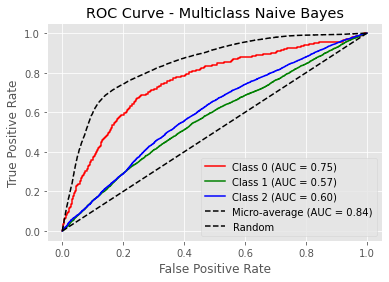

Precision:                           0
Accident Severity          
Fatal              0.044417
Serious            0.237443
Slight             0.830461


Recall:                           0
Accident Severity          
Fatal              0.439024
Serious            0.072122
Slight             0.834511


Confusion Matrix

                Pred Fatal  Pred Serious  Pred Slight
Actual Fatal      0.439024      0.100610     0.460366
Actual Serious    0.171521      0.072122     0.756357
Actual Slight     0.117261      0.048228     0.834511


Accuracy: 0.6959912713165765


In [7]:
y_test_binarized = label_binarize(y_test, classes=np.unique(data_out))

# Predict probabilities for the test data
y_probabilities = nb_classifier.predict_proba(X_test)

# Calculate the false positive rate, true positive rate, and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(data_out))):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC AUC
fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_probabilities.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot the ROC curves for each class
plt.figure()
colors = ['red', 'green', 'blue']  # Modify as per your number of classes
for i, color in zip(range(len(np.unique(data_out))), colors):
    plt.plot(fpr[i], tpr[i], color=color, label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

# Plot the micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, color='black', linestyle='--', label='Micro-average (AUC = {:.2f})'.format(roc_auc_micro))

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multiclass Naive Bayes')
plt.legend(loc='lower right')
plt.show()

y_pred = nb_classifier.predict(X_test)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
df_precision=pd.DataFrame(precision)
df_precision['Accident Severity'] =["Fatal","Serious","Slight"]
df_precision.set_index('Accident Severity', inplace=True)
df_recall=pd.DataFrame(recall)
df_recall['Accident Severity'] =["Fatal","Serious","Slight"]
df_recall.set_index('Accident Severity', inplace=True)
print("Precision:", df_precision)
print("\n")
print("Recall:", df_recall)
print("\n")

cm = confusion_matrix(y_test, y_pred)
normalized_cm = normalize(cm, axis=1, norm='l1')

# Create a DataFrame from the confusion matrix for better visualization
confusion_matrix_df = pd.DataFrame(normalized_cm, index=['Actual Fatal', 'Actual Serious', 'Actual Slight'], columns=['Pred Fatal', 'Pred Serious', 'Pred Slight'])
print("Confusion Matrix\n")
print(confusion_matrix_df)
print("\n")

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
